# Introduction
In this project I will learn and discover new things about the Medical cost dataset using regression models.

## 1) Importing and understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Leead\Desktop\insurance.csv')
# you can see here the head of the database:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Observation:

In [4]:
charges = df['charges'].mean()
print('The average medical cost is: ',round(charges),'$')

The average medical cost is:  13270 $


#### Feature Description

1) age: age of the person.<br>
2) sex: gender (female or male).<br>
3) bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,<br>
   objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
4) children: Number of children covered by health insurance / Number of dependents(Maximum 5)<br>
5) smoker: does the patient smoke?<br>
6) region: the patients residential area in the US, northeast, southeast, southwest, northwest.<br>
7) charges: Individual medical costs billed by health insurance<br>

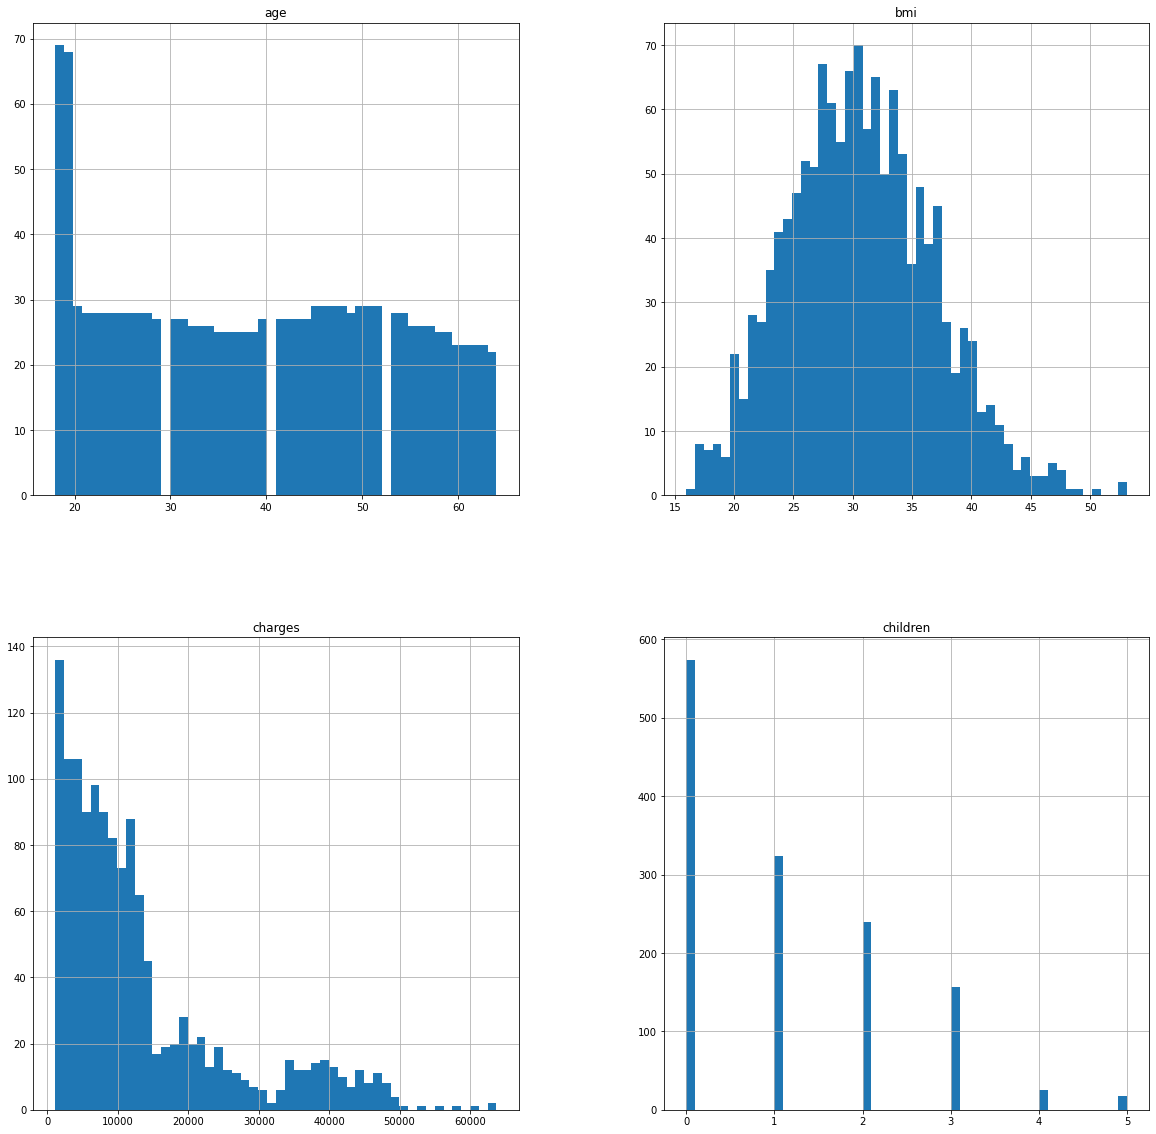

In [5]:
# First-hand look at the numerical features and their average grades:
df.hist(bins=50, figsize=(20,20))
plt.show()

Observation:<br>
We can see there is a high amount of under 20 year olds, and a low amount of +60. I'll check later what we can learn from this.

## 2) Cleaning the data

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


$\bullet$ There are no unnecessary features, so I won't remove any.

In [7]:
df.shape

(1338, 7)

#### We have 1338 examples and 7 features, and 'charges' is the target feature. 

#### Let's check if there are any null brackets.

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

$\bullet$ There are no null brackets so I won't have to fill anything.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


#### Info Summary:
$ \bullet int64(2):$ <br>
age<br>
children<br>

$\bullet object(3):$ <br>
sex<br>
smoker<br> 
region<br>

$\bullet float64(2):$ <br>
bmi<br>
charges<br>

### Change the 'object' type features into 'int' type
I will change features to type int in order to allow the data to be analized.

In [10]:
# Feature: sex:
df['sex'].replace({'male': 0, 'female': 1},inplace = True)

In [11]:
# Feature: smoker:
df['smoker'].replace({'no': 0, 'yes': 1},inplace = True)

In [12]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [13]:
# Feature: region:
df['region'].replace({'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3},inplace = True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


#### I have successfully converted the data into foat/int data types.

## 2) Visualization

#### Let's have a look at the correltion heatmap to see which features have the most correlation with charges.

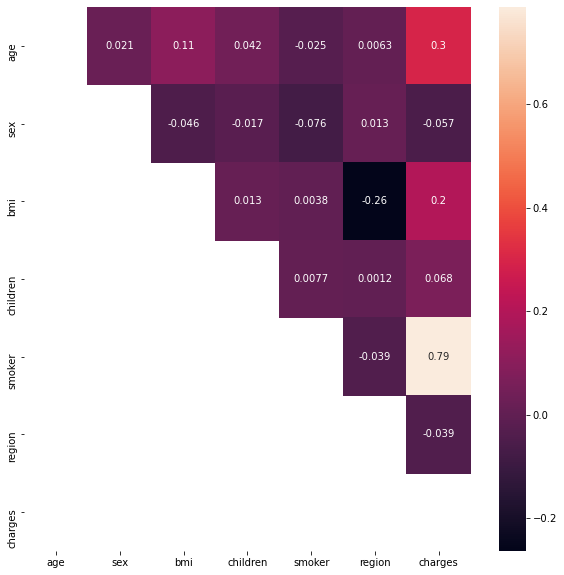

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, mask=np.tril(df.corr()))

Brief overview:<br>
$\bullet$ We can see that smoking impacts the medical charges the most, which is understandable.<br>
$\bullet$ Age is a strong factor in medical charges, the older one gets, the more medical attention he needs.<br>
$\bullet$ Surprisingly the sex does not have a lot of coorlationwith charges.<br>

#### Let's analyze the heat map in ratio to charges

$\bullet$ Age vs Charges

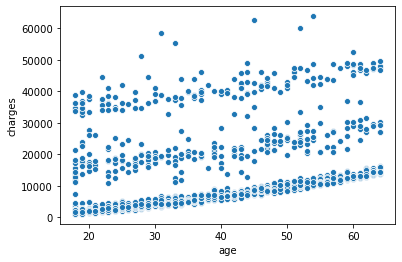

In [17]:
sns.scatterplot(df.age, df.charges)
plt.show()

#### Why are there 3 linear lines? It looks like every age group is split to 3 groups when it comes to charges. Let's try and see what we can find out.<br>
I'll check the under 20 age group:

In [18]:
under_20 = df.query('age <= 20')
print('Amount of under 20:',under_20.shape)
print(under_20.mean())

Amount of under 20: (166, 7)
age           18.759036
sex            0.481928
bmi           30.087018
children       0.512048
smoker         0.234940
region         1.415663
charges     8713.482413
dtype: float64


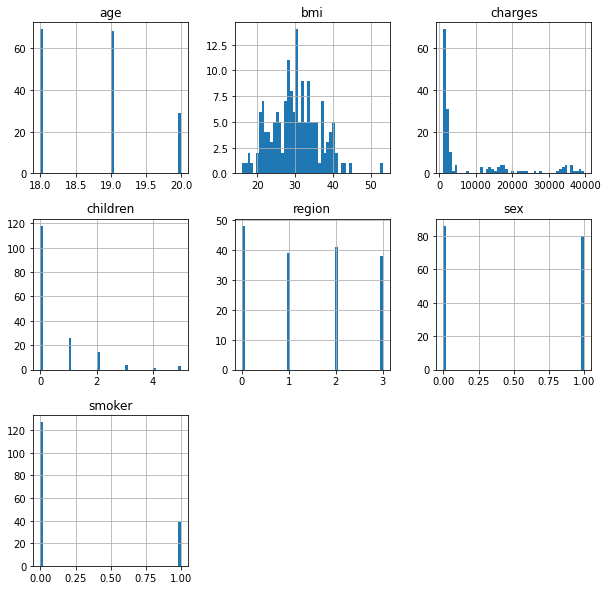

In [19]:
under_20.hist(bins=50, figsize=(10,10))
plt.show()

In [20]:
low_medCost = under_20.query('charges < 10000')
print('Amount of low Medical cost:',len(low_medCost))
print(low_medCost.mean())

Amount of low Medical cost: 116
age           18.724138
sex            0.500000
bmi           29.963621
children       0.482759
smoker         0.000000
region         1.405172
charges     2020.309549
dtype: float64


In [21]:
medium_medCost = under_20.query('10000 < charges < 30000')
print('Amount of medium Medical cost:',medium_medCost.shape)
print(medium_medCost.mean())

Amount of medium Medical cost: (31, 7)
age            18.838710
sex             0.516129
bmi            27.571774
children        0.645161
smoker          0.645161
region          1.580645
charges     17290.323072
dtype: float64


In [22]:
high_medCost = under_20.query('30000 < charges < 50000')
print('Amount of high Medical cost:',high_medCost.shape)
print(high_medCost.mean())

Amount of high Medical cost: (19, 7)
age            18.842105
sex             0.315789
bmi            34.944211
children        0.473684
smoker          1.000000
region          1.210526
charges     35583.271452
dtype: float64


#### Observations:<br>
1) Everyone that is 20 and under and pay over \\$30,000 are smokers, and all of them have an obese BMI (+30)!<br>
2) Not one person 20 and under that smkokes, pays less then \\$10,000!<br>
3) We can clearly see that as you get older, your medical bill tends to increase, which is understandable.


$\bullet$ Sex vs Charges

In [23]:
df[["sex","charges"]].groupby(["sex"],as_index=False).mean().sort_values(by="charges",ascending=False)

# Male = 0
#female = 1

,sex,charges
0,0,13956.751178
1,1,12569.578844


Let's have a look at the difference between male and female at the younger and older age groups.

In [24]:
over_60 = df.query('age >=60')

In [25]:
print('There are',len(under_20),'people 20 years and under.')
print('There are',len(over_60),'people 60 years and over.')

There are 166 people 20 years and under.
There are 114 people 60 years and over.


In [26]:
print('Male 20 years and under')
print(under_20.query('sex>0').mean())
print()
print('Female 20 years and under')
print(under_20.query('sex<1').mean())

Male 20 years and under
age           18.762500
sex            1.000000
bmi           30.716563
children       0.512500
smoker         0.212500
region         1.375000
charges     7941.884254
dtype: float64

Female 20 years and under
age           18.755814
sex            0.000000
bmi           29.501395
children       0.511628
smoker         0.255814
region         1.453488
charges     9431.248142
dtype: float64


In [27]:
print('Male 60 years and over')
print(over_60.query('sex>0').mean())
print()
print('Female 60 years and over')
print(over_60.query('sex<1').mean())

Male 60 years and over
age            62.000000
sex             1.000000
bmi            31.322931
children        0.568966
smoker          0.224138
region          1.465517
charges     20372.003917
dtype: float64

Female 60 years and over
age            61.964286
sex             0.000000
bmi            32.734464
children        0.625000
smoker          0.250000
region          1.428571
charges     22155.326209
dtype: float64


#### Observation:<br>
$\bullet$ Here we can see that at the age group of 20 and under, Male spend on average about \\$1,500 less on medical bills than female. <br>
$\bullet$ In the 60 and over age groupe, female spend on average about \\$2,000 on medical bills more then male do.<br>
$\bullet$ All the other features are just about the same, so I can learn from here that older woman tend to be more costly in terms of medical bills.

$\bullet$ Smoker vs Charges

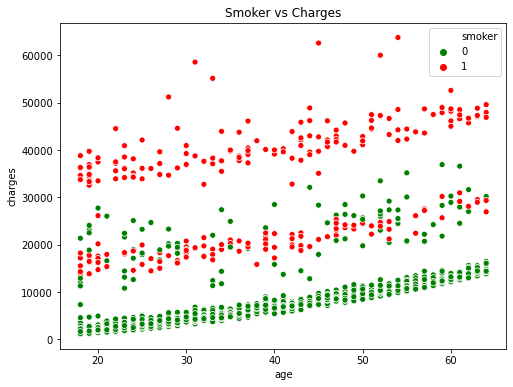

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['green','red'])
plt.title("Smoker vs Charges")
plt.show()

In [29]:
df.groupby(['smoker']).mean()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,39.385338,0.514098,30.651795,1.090226,1.477444,8434.268298
1,38.514599,0.419708,30.708449,1.113139,1.368613,32050.231832


#### Observation:<br>
$smoker = 1$<br>
$non-smoker = 0$<br>
$\bullet$We can clearly see that a patient that smokes, on average is going to have a higher medical bill than a non-smoker.<br>
$\bullet$ What we can also learn is that the older you get the medical bill for smokers rise in a linear fashion.

#### Let's have a look at the 20 and under and the 60 and over age group differences, when it comes to smoking and charges:

In [30]:
under_20.groupby(['smoker']).mean()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,18.708661,0.496063,30.090394,0.527559,1.409449,3413.875214
1,18.923077,0.435897,30.076026,0.461538,1.435897,25971.177649


In [31]:
over_60.groupby(['smoker']).mean()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,61.942529,0.517241,32.085460,0.563218,1.540230,15232.70948
1,62.111111,0.481481,31.793519,0.703704,1.148148,40630.69519


#### Observation:<br>
$\bullet$ As we see, people in the 20 and under age group who smoke spend almost x8 more on medical costs then non smokers.<br>
$\bullet$ For the 60 and over, the difference is less.

$\bullet$ BMI vs Charges

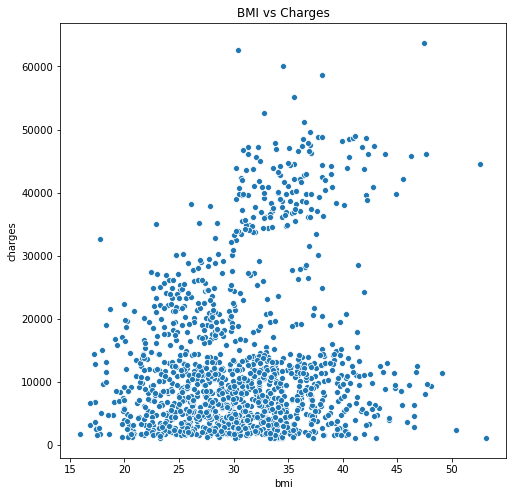

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(df.bmi, df.charges)
plt.title("BMI vs Charges")
plt.show()

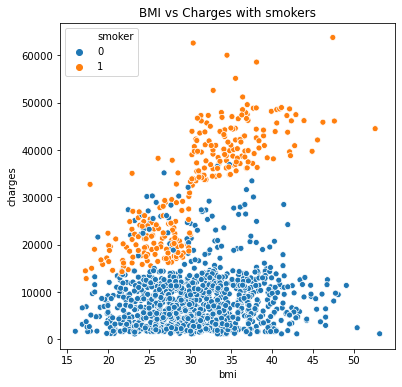

In [33]:
plt.figure(figsize=(6,6))
sns.scatterplot(df.bmi, df.charges, hue=df.smoker)
plt.title("BMI vs Charges with smokers")
plt.show()

#### Observation:<br>
$\bullet$ A healthy adults bmi should be between 18.5 to 25(not including). Over that and under 30 is considered overweight and anything over that is considered obesity. As we can see in the graph, if your BMI is over 30, your medical charges go up. This makes a lot of sense.<br>

#### Observation:<br>
$\bullet$ When I compared the smokers to non-smokers, the average BMI between the two was almost identical, but the medical cost was much higher for the smokers.<br>
$\bullet$ I created a second BMI graph including smokers. You can see that even though someone has high BMI, the medical cost doesnt necessarily go up.<br>
$\bullet$ If someone is a smoker with high BMI, his medical bill is much higher than a non-smoker with the same BMI. Which means that smoking effects the medical bill much more then high BMI.

$\bullet$ Region vs Charges

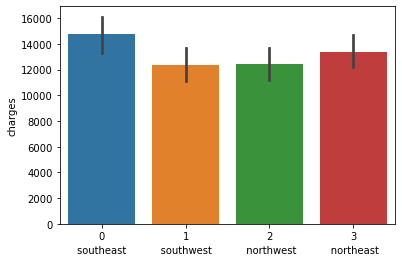

In [34]:
sns.barplot(x='region', y='charges', data=df)
plt.xlabel("southeast           southwest           northwest           northeast")
plt.show()

#### Observation:<br>
$\bullet$ We can see according to the our data that around the southeast region the medical cost goes up. Maybe because it is a tropical area which tends to attract older people, or maybe more people smoke in that area.<br>

In [35]:
df.groupby(['region']).mean()

,age,sex,bmi,children,smoker,charges
region,,,,,,
0,38.939560,0.480769,33.355989,1.049451,0.250000,14735.411438
1,39.455385,0.498462,30.596615,1.141538,0.178462,12346.937377
2,39.196923,0.504615,29.199785,1.147692,0.178462,12417.575374
3,39.268519,0.496914,29.173503,1.046296,0.206790,13406.384516


$\bullet$ We can see that in the southeast, smoking and high BMI are greater which might be the reason why the charges are higher there.

$\bullet$ Children vs Charges

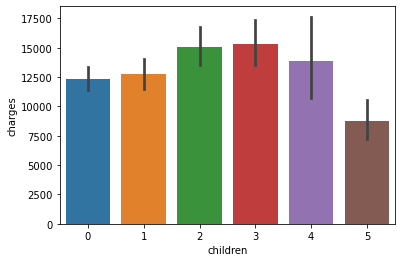

In [36]:
sns.barplot(x='children', y='charges', data=df)
plt.show()

#### Observation:<br>
$\bullet$ We can see that if you have the maximum and minimum amount of children in the dataset, on average you spend less on medical costs. This might be because if you have 5 children, you have less money to spend medicaly on them. If you have no children then you just don't have the medical costs to spend.

#### Since BMI and Smoking are the main two contributers to medical charges, I would like to see which one is more costly:

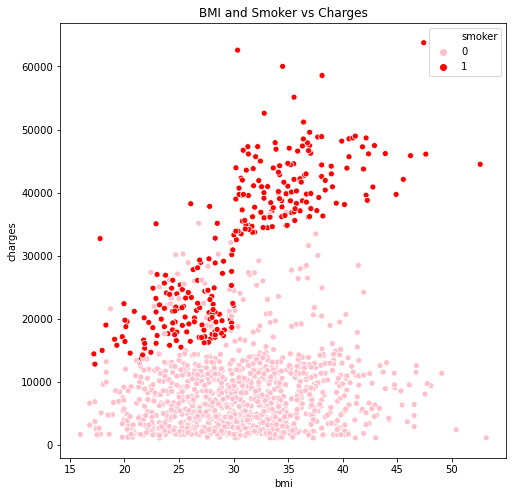

In [37]:
plt.figure(figsize=(8,8))
sns.scatterplot(df.bmi, df.charges,hue = df.smoker, palette= ['pink','red'])
plt.title("BMI and Smoker vs Charges")
plt.show()

#### Let's use Groupby and check the data more.

In [38]:
a = df.groupby("smoker")
a.mean()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,39.385338,0.514098,30.651795,1.090226,1.477444,8434.268298
1,38.514599,0.419708,30.708449,1.113139,1.368613,32050.231832


In [39]:
df.groupby(['smoker', "sex"]).charges.mean()

smoker  sex
0       0       8087.204731
        1       8762.297300
1       0      33042.005975
        1      30678.996276
Name: charges, dtype: float64

Observation: We can see that nonsmoking women spend more on medical bills then men, but when it comes to smoking men are the ones who spend more.<br>
Let's see if the bmi might cause this effect.

In [40]:
df.groupby(['smoker', "sex"]).bmi.mean()

smoker  sex
0       0      30.770580
        1      30.539525
1       0      31.504182
        1      29.608261
Name: bmi, dtype: float64

Observation: <br>
$\bullet$ What we can see here, is that bmi is greater for men who smoke than woman. Also, their bmi exceeds 30 which falls into the obesity catagory. This might be the reason why the men medical bills are higher than woman.


$\bullet$ We can see through the chart that smoking has a greater influence on the medical cost than BMI.<br>
$\bullet$ We can also learn from the groupby chart, that in both smokers and non-smokers, the BMI is just about the same. What is more interesting is that the medical cost almost quadruples if you are a smoker. Don't smoke!<br>

## 3) Machine learning Models
$\bullet$ After splitting the data, I will test it with and without scaling in order to see the difference. <br>
### Models to be used:<br>
$\bullet$ Dummy Regression<br>
$\bullet$ Linear Regression<br>
$\bullet$ Random Forest Regresion

### What I will be looking at:<br>
In order to determine how well the models do I will be looking at the following scores:<br>
####  R-squared:<br>
$\bullet$ It is a measure of how close each data point fits to the regression line. It will tell us how well the regression line predicts the actual values. <br>
$\bullet$ The closer R-squared is to 1 the better the prediction value is to the actual value. If the R-squared score is low that means the the regression line fits the data less.<br>
$\bullet$If the R-squared score is exactly 1, it means we can predict the Medical charge for any given example.  
#### Mean Absolute Error <br>
$\bullet$ It is the absolute mean value of the sum of the distance(on the y axis) of each point, devided by the amount of points.<br>
$\bullet$ The lower the error, the better the regression line fits the data.
#### Root Mean Square Error (RMSE)<br>
$\bullet$ Here we take the error of each point, square it, take the average and then take the square root of that.<br>
$\bullet$ We get another score for the error of the regression model, ecept here we emphasize larger errors a bit more.

#### First let's split the data. The test set will to be 20% and the training set will be 80%.

In [52]:
# Importing
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [53]:
X = df.drop(['charges'], axis = 1)
Y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('x_train:',x_train.shape)
print('y_train:',y_train.shape)
print('x_test:',x_test.shape)
print('y_test:',y_test.shape)

x_train: (1070, 6)
y_train: (1070,)
x_test: (268, 6)
y_test: (268,)


We can see that the data was split accordingly:<br>
Train: 1070 rows and 6 columns(dropped 'charges')<br>
Test: 268 rows and 6 columns(dropped 'charges')

#### Now let's creat a copy of the data, just this time it will be scaled in order to see if there is a difference.

$\bullet$ I will use the MinMaxScaler

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scal_df = df
scaler = MinMaxScaler()
scaled = scaler.fit_transform(scal_df)
scaled.shape

(1338, 7)

In [56]:
scaled

array([[0.02173913, 1.        , 0.3212268 , ..., 1.        , 0.33333333,
        0.25161076],
       [0.        , 0.        , 0.47914985, ..., 0.        , 0.        ,
        0.00963595],
       [0.2173913 , 0.        , 0.45843422, ..., 0.        , 0.        ,
        0.05311516],
       ...,
       [0.        , 1.        , 0.56201238, ..., 0.        , 0.        ,
        0.00810808],
       [0.06521739, 1.        , 0.26472962, ..., 0.        , 0.33333333,
        0.01414352],
       [0.93478261, 1.        , 0.35270379, ..., 1.        , 0.66666667,
        0.44724873]])

In [57]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [58]:
df_sc = pd.DataFrame({'age': scaled[:, 0], 'sex': scaled[:, 1], 'bmi': scaled[:, 2], 'children': scaled[:,3],
                        'smoker': scaled[:,4], 'region': scaled[:, 5], 'charges': scaled[:,6]})
df_sc.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1.0,0.321227,0.0,1.0,0.333333,0.251611
1,0.000000,0.0,0.479150,0.2,0.0,0.000000,0.009636
2,0.217391,0.0,0.458434,0.6,0.0,0.000000,0.053115
3,0.326087,0.0,0.181464,0.0,0.0,0.666667,0.333010
4,0.304348,0.0,0.347592,0.0,0.0,0.666667,0.043816


$\bullet$ Now we see that all of the data (including the training and test) is scaled between 0 and 1.

#### Now lets split the scaled data.

In [59]:
x_sc = df_sc.drop(['charges'], axis = 1)
y_sc = df_sc['charges']
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y_sc, test_size=0.2, random_state=0)
print('x_train_sc:',x_train_sc.shape)
print('y_train_sc:',y_train_sc.shape)
print('x_test_sc:',x_test_sc.shape)
print('y_test_sc:',y_test_sc.shape)

x_train_sc: (1070, 6)
y_train_sc: (1070,)
x_test_sc: (268, 6)
y_test_sc: (268,)


#### Let's remember what the mean of the charges was:

In [60]:
charges = df['charges'].mean()
print('The average medical cost is: $',round(charges))

The average medical cost is: $ 13270


### $\bullet$ Dummy Regressor

In [61]:
# Importing
from sklearn.dummy import DummyRegressor

In [62]:
dReg = DummyRegressor(strategy="mean")
dReg.fit(x_train, y_train)
y_pred_dReg=dReg.predict(x_test)
print('Dummy data')
print('R-Squared score: ',dReg.score(x_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_dReg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dReg)))

Dummy data
R-Squared score:  0.0
Mean Absolute Error: 9420.088402029676
Root Mean Squared Error: 12619.408067596905


Observation:<br>
With the Dummy Regression we get a huge RMS error of \\$12,619, that is about 90%!
    

### $\bullet$ Linear Regression

In [63]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

##### Normal data

In [64]:
lReg_No_scale = linear_model.LinearRegression()
lReg_No_scale.fit(x_train,y_train) #training the algorithm
y_train_pred_No_scale = lReg_No_scale.predict(x_train)
y_test_pred_No_scale = lReg_No_scale.predict(x_test)

Let's have a look at the Prediction/Actual cost graph and chart:

In [65]:
y_pred = lReg_No_scale.predict(x_test)
pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred, "Difference": np.array(abs(y_test-y_pred))})

,Actual Cost,Predicted Cost,Difference
578,9724.53000,11284.718170,1560.188170
610,8547.69130,9426.825984,879.134684
569,45702.02235,38132.984183,7569.038167
1034,12950.07120,16212.994235,3262.923035
198,9644.25250,6844.372246,2799.880254
...,...,...,...
1084,15019.76005,14691.489056,328.270994
726,6664.68595,8213.262079,1548.576129
1132,20709.02034,16161.602178,4547.418162
725,40932.42950,32855.664400,8076.765100


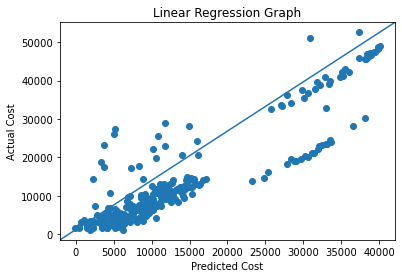

In [66]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Cost")
plt.ylabel("Actual Cost")
plt.title("Linear Regression Graph")
plt.show()

#### Scaled data

In [67]:
lReg_Yes_scale = linear_model.LinearRegression()
lReg_Yes_scale.fit(x_train_sc,y_train_sc) #training the algorithm
y_train_pred_Yes_scale = lReg_Yes_scale.predict(x_train_sc)
y_test_pred_Yes_scale = lReg_Yes_scale.predict(x_test_sc)

Let's have a look at the Prediction/Actual cost graph and chart:

In [68]:
y_pred_sc = lReg_Yes_scale.predict(x_test_sc)
pd.DataFrame({'Actual Cost': y_test_sc, 'Predicted Cost': y_pred_sc, "Difference": np.array(abs(y_test_sc-y_pred_sc))})

,Actual Cost,Predicted Cost,Difference
578,0.137316,0.162220,0.024904
610,0.118531,0.132564,0.014033
569,0.711591,0.590774,0.120817
1034,0.188802,0.240885,0.052083
198,0.136035,0.091343,0.044692
...,...,...,...
1084,0.221839,0.216599,0.005240
726,0.088475,0.113193,0.024718
1132,0.312651,0.240065,0.072586
725,0.635458,0.506537,0.128922


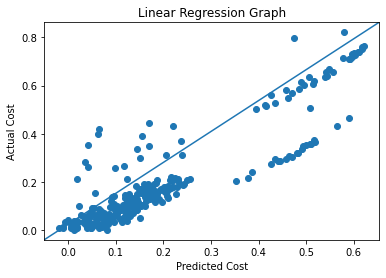

In [69]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred_sc, y_test_sc)
plt.xlabel("Predicted Cost")
plt.ylabel("Actual Cost")
plt.title("Linear Regression Graph")
plt.show()

#### Let's check the R-squared, Mean absolute Error and RMSE to see what we can learn.

In [70]:
print('Normal data')
print('Normal data:',lReg_No_scale.score(x_test,y_test))
print('R-Squared score: ',lReg_No_scale.score(x_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print()
print('Scaled data')
print('Scaled data:',lReg_Yes_scale.score(x_test_sc,y_test_sc))
print('R-Squared score: ',lReg_Yes_scale.score(x_train_sc, y_train_sc))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_sc, y_pred_sc))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_sc, y_pred_sc)))

Normal data
Normal data: 0.799796841255606
R-Squared score:  0.7369902703793605
Mean Absolute Error: 3930.8744170009004
Root Mean Squared Error: 5644.317594516271

Scaled data
Scaled data: 0.799796841255606
R-Squared score:  0.7369902703793605
Mean Absolute Error: 0.06274485457555755
Root Mean Squared Error: 0.09009493793912349


### Linear Regression Conclusion:<br>
$\bullet$ The scaler had no effect on the Linear Regression model score. Both were 79.9%<br>
$\bullet$ The R-squared score was 0.736 which means that 73% of the data fit the regression line, not bad.<br>
$\bullet$ The Medical cost mean is \\$13,270. The RMSE score is \\$5,644, that means the model has an error of almost 50%, that's not too good.<br>
$\bullet$ Compared to the Dummy Regressor, the model is a huge improvment!

## $\bullet$ Random Forest Regresion<br>
$\bullet$ This model constructs a lot of decision trees at training time, and outputs the average prediction of the individual tree.<br>
$\bullet$ When we use Random Forest, we arn't required to scale the features since they are not sensitive to the variance in the data. So I will not use the scaled data.

In [76]:
# Importing:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rfReg = RandomForestRegressor(random_state=0)
rfReg.fit(x_train, y_train)
y_pred_rfReg = rfReg.predict(x_test)

Let's have a look at the Prediction/Actual cost graph and chart:

In [78]:
pd.DataFrame({'Actual Cost': y_test, 'Predicted Cost': y_pred_rfReg, "Difference": np.array(abs(y_test-y_pred_rfReg))})

,Actual Cost,Predicted Cost,Difference
578,9724.53000,11144.142676,1419.612676
610,8547.69130,9760.967386,1213.276086
569,45702.02235,44258.664568,1443.357782
1034,12950.07120,13075.420905,125.349705
198,9644.25250,9730.771166,86.518666
...,...,...,...
1084,15019.76005,16062.688599,1042.928549
726,6664.68595,6630.908090,33.777860
1132,20709.02034,11495.005436,9214.014904
725,40932.42950,42821.433741,1889.004241


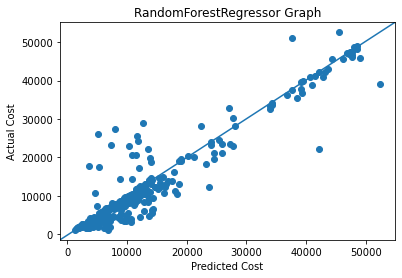

In [79]:
fig, ax = plt.subplots()
ax.plot([0,1],[0,1], transform=ax.transAxes)

plt.scatter(y_pred_rfReg, y_test)
plt.xlabel("Predicted Cost")
plt.ylabel("Actual Cost")
plt.title("RandomForestRegressor Graph")
plt.show()

In [80]:
print('Random Forest')
print('Random Forest score:',rfReg.score(x_test,y_test))
print('R-Squared score: ',rfReg.score(x_train, y_train))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rfReg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfReg)))

Random Forest
Random Forest score: 0.8767759589627513
R-Squared score:  0.9735930239801572
Mean Absolute Error: 2609.904627076461
Root Mean Squared Error: 4428.164067357651


### Random Forest  Regression Conclusion:<br>
$\bullet$ As the graph shows, the Random Forest Regression fits the data a lot better.<br>
$\bullet$ The Random Forest score is a lot higher 87.6%.<br>
$\bullet$ The R-squared score was 0.973 which means that 97.3% of the data fit the regression line, much better than the Linear Regression model.<br>
$\bullet$ The RMS error is \\$4,428, which is better.

#  Final Conclusion:<br>
$\bullet$ In this project I analysed a medical cost dataset. <br>
$\bullet$ My aim was to learn as many hidden discoveries in the data as I can, and also build a reggresion model.<br>
$\bullet$ I learned that there is a linear connection between smoking, BMI and medical costs.<br>
$\bullet$ As for the models, I learned that the Random Forest Regression fits the data much better.<br>
$\bullet$ I also learned that the MinMaxScaler did not have the impact I was expecting on the model score.